[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\srija\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\srija\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Alpha: 0.1, Mean Accuracy: 0.7690, Std Deviation: 0.0301
Alpha: 0.5, Mean Accuracy: 0.7660, Std Deviation: 0.0111
Alpha: 1.0, Mean Accuracy: 0.7690, Std Deviation: 0.0073
Alpha: 1.5, Mean Accuracy: 0.7610, Std Deviation: 0.0058
Alpha: 2.0, Mean Accuracy: 0.7630, Std Deviation: 0.0060
Accuracy: 95.70%
Precision: 95.43%
Recall: 96.00%


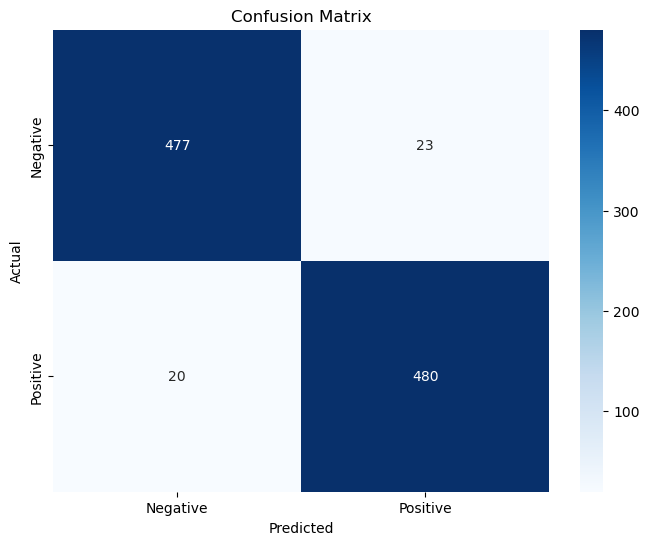

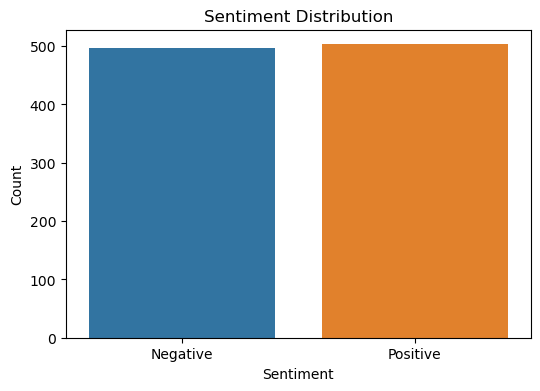

In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv('Restaurant_Reviews.tsv', delimiter='\t')
nltk.download('stopwords')
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    words = text.split()
    words = [word for word in words if word.lower() not in stop_words]
    words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(words)
data['Review'] = data['Review'].apply(preprocess_text)
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(data['Review'])
y_train = data['Liked']
alphas = [0.1, 0.5, 1.0, 1.5, 2.0]
param_grid = {'alpha': alphas}
grid_search = GridSearchCV(MultinomialNB(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_tfidf, y_train)
results = grid_search.cv_results_
for alpha, mean_score, std_score in zip(results['param_alpha'], results['mean_test_score'], results['std_test_score']):
    print(f'Alpha: {alpha}, Mean Accuracy: {mean_score:.4f}, Std Deviation: {std_score:.4f}')
best_alpha = grid_search.best_params_['alpha']
best_model = grid_search.best_estimator_
best_model.fit(X_train_tfidf, y_train)
data['Predicted_Sentiment'] = best_model.predict(X_train_tfidf)
accuracy = accuracy_score(data['Liked'], data['Predicted_Sentiment'])
precision = precision_score(data['Liked'], data['Predicted_Sentiment'])
recall = recall_score(data['Liked'], data['Predicted_Sentiment'])
accuracy_percentage = accuracy * 100
precision_percentage = precision * 100
recall_percentage = recall * 100
print(f'Accuracy: {accuracy_percentage:.2f}%')
print(f'Precision: {precision_percentage:.2f}%')
print(f'Recall: {recall_percentage:.2f}%')
conf_matrix = confusion_matrix(data['Liked'], data['Predicted_Sentiment'])
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
sentiment_counts = data['Predicted_Sentiment'].value_counts()
plt.figure(figsize=(6, 4))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution')
plt.xticks([0, 1], ['Negative', 'Positive'])
plt.show()
